檢查是否有連結GPU

https://colab.research.google.com/notebooks/gpu.ipynb

In [1]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [2]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%cd /content/drive/MyDrive/

/content/drive/MyDrive


In [ ]:
import pandas as pd
data0725 = pd.read_csv("ptt_stock_analysis_result725ok.csv")
data0725

,Unnamed: 0.1,Unnamed: 0,Title,Author,Date,Content,Link,Pushes
0,0,0,[閒聊] 2023/07/25 盤中閒聊,vendan5566 (阿文),Tue Jul 25 08:30:00 2023,\n==============112/07/25台股資訊重點整理，供股民做投資參考====...,https://www.ptt.cc/bbs/Stock/M.1690245002.A.AD...,"{""0"":{""Tag"":""PUSH"",""Userid"":""TeddyPig5566"",""Co..."


In [ ]:
import json

pd.DataFrame(json.loads(data0725["Pushes"][0])).T

,Tag,Userid,Content,Ip,Ipdatetime,Sentiment,Stocktarget
0,PUSH,TeddyPig5566,肉鬆怎麼酥~~~,None,07/25 08:30,positive,
1,ARROW,zzzzzzzzzzzy,開盤比手速,None,07/25 08:30,neutral,
2,PUSH,Hsiencheng,今天強嘎！,None,07/25 08:30,positive,
3,PUSH,dragonmester,99緯創,None,07/25 08:30,neutral,99緯創
4,PUSH,ipath19,文雯早 大家早,None,07/25 08:30,neutral,
...,...,...,...,...,...,...,...
5294,ARROW,dosiris,怎麼跟我一樣180接 笑鼠,None,07/25 14:02,neutral,
5295,PUSH,luchiya123,https://i.imgur.com/6Cp99ue.jpg,None,07/25 14:02,neutral,
5296,PUSH,dosiris,180-18股息-70股息 今年也解套了,None,07/25 14:04,positive,
5297,PUSH,SimleToMe,樓上不算減資後的股價嗎,None,07/25 14:09,neutral,


import numpy as np
from google.colab import autoviz

def categorical_histogram(df, colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  df.groupby(colname).size().plot(kind='barh', color=sns.palettes.mpl_palette(mpl_palette_name), figsize=(8*figscale, 4.8*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(_df_16, *['Tag'], **{})
chart

import numpy as np
from google.colab import autoviz

def categorical_histogram(df, colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  df.groupby(colname).size().plot(kind='barh', color=sns.palettes.mpl_palette(mpl_palette_name), figsize=(8*figscale, 4.8*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(_df_17, *['Sentiment'], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_18, *['Ipdatetime', 'count()', 'Tag'], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_19, *['Ipdatetime', 'count()', 'Sentiment'], **{})
chart

import numpy as np
from google.colab import autoviz

def heatmap(df, x_colname, y_colname, figscale=1, mpl_palette_name='viridis'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  import pandas as pd
  plt.subplots(figsize=(8 * figscale, 8 * figscale))
  df_2dhist = pd.DataFrame({
      x_label: grp[y_colname].value_counts()
      for x_label, grp in df.groupby(x_colname)
  })
  sns.heatmap(df_2dhist, cmap=mpl_palette_name)
  plt.xlabel(x_colname)
  plt.ylabel(y_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = heatmap(_df_20, *['Tag', 'Sentiment'], **{})
chart

In [4]:
from PTTScraper import PTTScraper

board = "Gossiping"
scraper = PTTScraper(board)
data = scraper.get_data_days_before(1, max_posts=300)

2023-10-19 00:00:00
文章總篇數: 19
2023-10-19 00:00:00
文章總篇數: 39
2023-10-19 00:00:00
文章總篇數: 58
2023-10-19 00:00:00
文章總篇數: 77
2023-10-19 00:00:00
文章總篇數: 97
2023-10-19 00:00:00
文章總篇數: 116
2023-10-19 00:00:00
文章總篇數: 136
2023-10-19 00:00:00
文章總篇數: 156
2023-10-19 00:00:00
文章總篇數: 176
2023-10-19 00:00:00
文章總篇數: 196
2023-10-19 00:00:00
文章總篇數: 215
2023-10-19 00:00:00
文章總篇數: 235
2023-10-19 00:00:00
文章總篇數: 255
2023-10-19 00:00:00
文章總篇數: 275
2023-10-19 00:00:00
文章總篇數: 294
2023-10-19 00:00:00
文章總篇數: 300


In [5]:
!pip install -U ckiptagger[tf,gdown]

In [6]:
from ckiptagger import data_utils, construct_dictionary, WS, POS, NER

In [ ]:
# data_utils.download_data_gdown("./")
data_utils.download_data_url("./")

In [7]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

In [8]:
ws = WS("./data", disable_cuda=False)
pos = POS("./data", disable_cuda=False)
ner = NER("./data", disable_cuda=False)

/usr/local/lib/python3.10/dist-packages/ckiptagger/model_ws.py:106: UserWarning: `tf.nn.rnn_cell.LSTMCell` is deprecated and will be removed in a future version. This class is equivalent as `tf.keras.layers.LSTMCell`, and will be replaced by that in Tensorflow 2.0.
  cell = tf.compat.v1.nn.rnn_cell.LSTMCell(hidden_d, name=name)
/usr/local/lib/python3.10/dist-packages/ckiptagger/model_pos.py:56: UserWarning: `tf.nn.rnn_cell.LSTMCell` is deprecated and will be removed in a future version. This class is equivalent as `tf.keras.layers.LSTMCell`, and will be replaced by that in Tensorflow 2.0.
  cell = tf.compat.v1.nn.rnn_cell.LSTMCell(hidden_d, name=name)
/usr/local/lib/python3.10/dist-packages/ckiptagger/model_ner.py:57: UserWarning: `tf.nn.rnn_cell.LSTMCell` is deprecated and will be removed in a future version. This class is equivalent as `tf.keras.layers.LSTMCell`, and will be replaced by that in Tensorflow 2.0.
  cell = tf.compat.v1.nn.rnn_cell.LSTMCell(hidden_d, name=name)


In [9]:
import pandas as pd

df = pd.DataFrame(data)
sentence_list = list(df.Content)

In [10]:
word_sentence_list = ws(
    sentence_list,
    # sentence_segmentation = True, # To consider delimiters
    # segment_delimiter_set = {",", "。", ":", "?", "!", ";"}), # This is the defualt set of delimiters
    # recommend_dictionary = dictionary1, # words in this dictionary are encouraged
    # coerce_dictionary = dictionary2, # words in this dictionary are forced
)

pos_sentence_list = pos(word_sentence_list)

entity_sentence_list = ner(word_sentence_list, pos_sentence_list)

In [ ]:
# def print_word_pos_sentence(word_sentence, pos_sentence):
#     assert len(word_sentence) == len(pos_sentence)
#     for word, pos in zip(word_sentence, pos_sentence):
#         print(f"{word}({pos})", end="\u3000")
#     print()
#     return

# for i, sentence in enumerate(sentence_list):
#     print()
#     print(f"'{sentence}'")
#     print_word_pos_sentence(word_sentence_list[i],  pos_sentence_list[i])
#     for entity in sorted(entity_sentence_list[i]):
#         print(entity)

In [ ]:
import pandas as pd

count_list = []
# count_dict = {}
for e in entity_sentence_list:
    for i in e:
#         count_dict[i[3]] = count_dict.get(i[3], 0) + 1
#         df = pd.concat([df, pd.DataFrame(i[3])])
        if i[2] != 'DATE' and i[2] != 'CARDINAL' :
          count_list.append(i[3])

In [ ]:
df = pd.DataFrame(count_list, columns=["entity"])
text = df.entity.value_counts()
text.head(30)

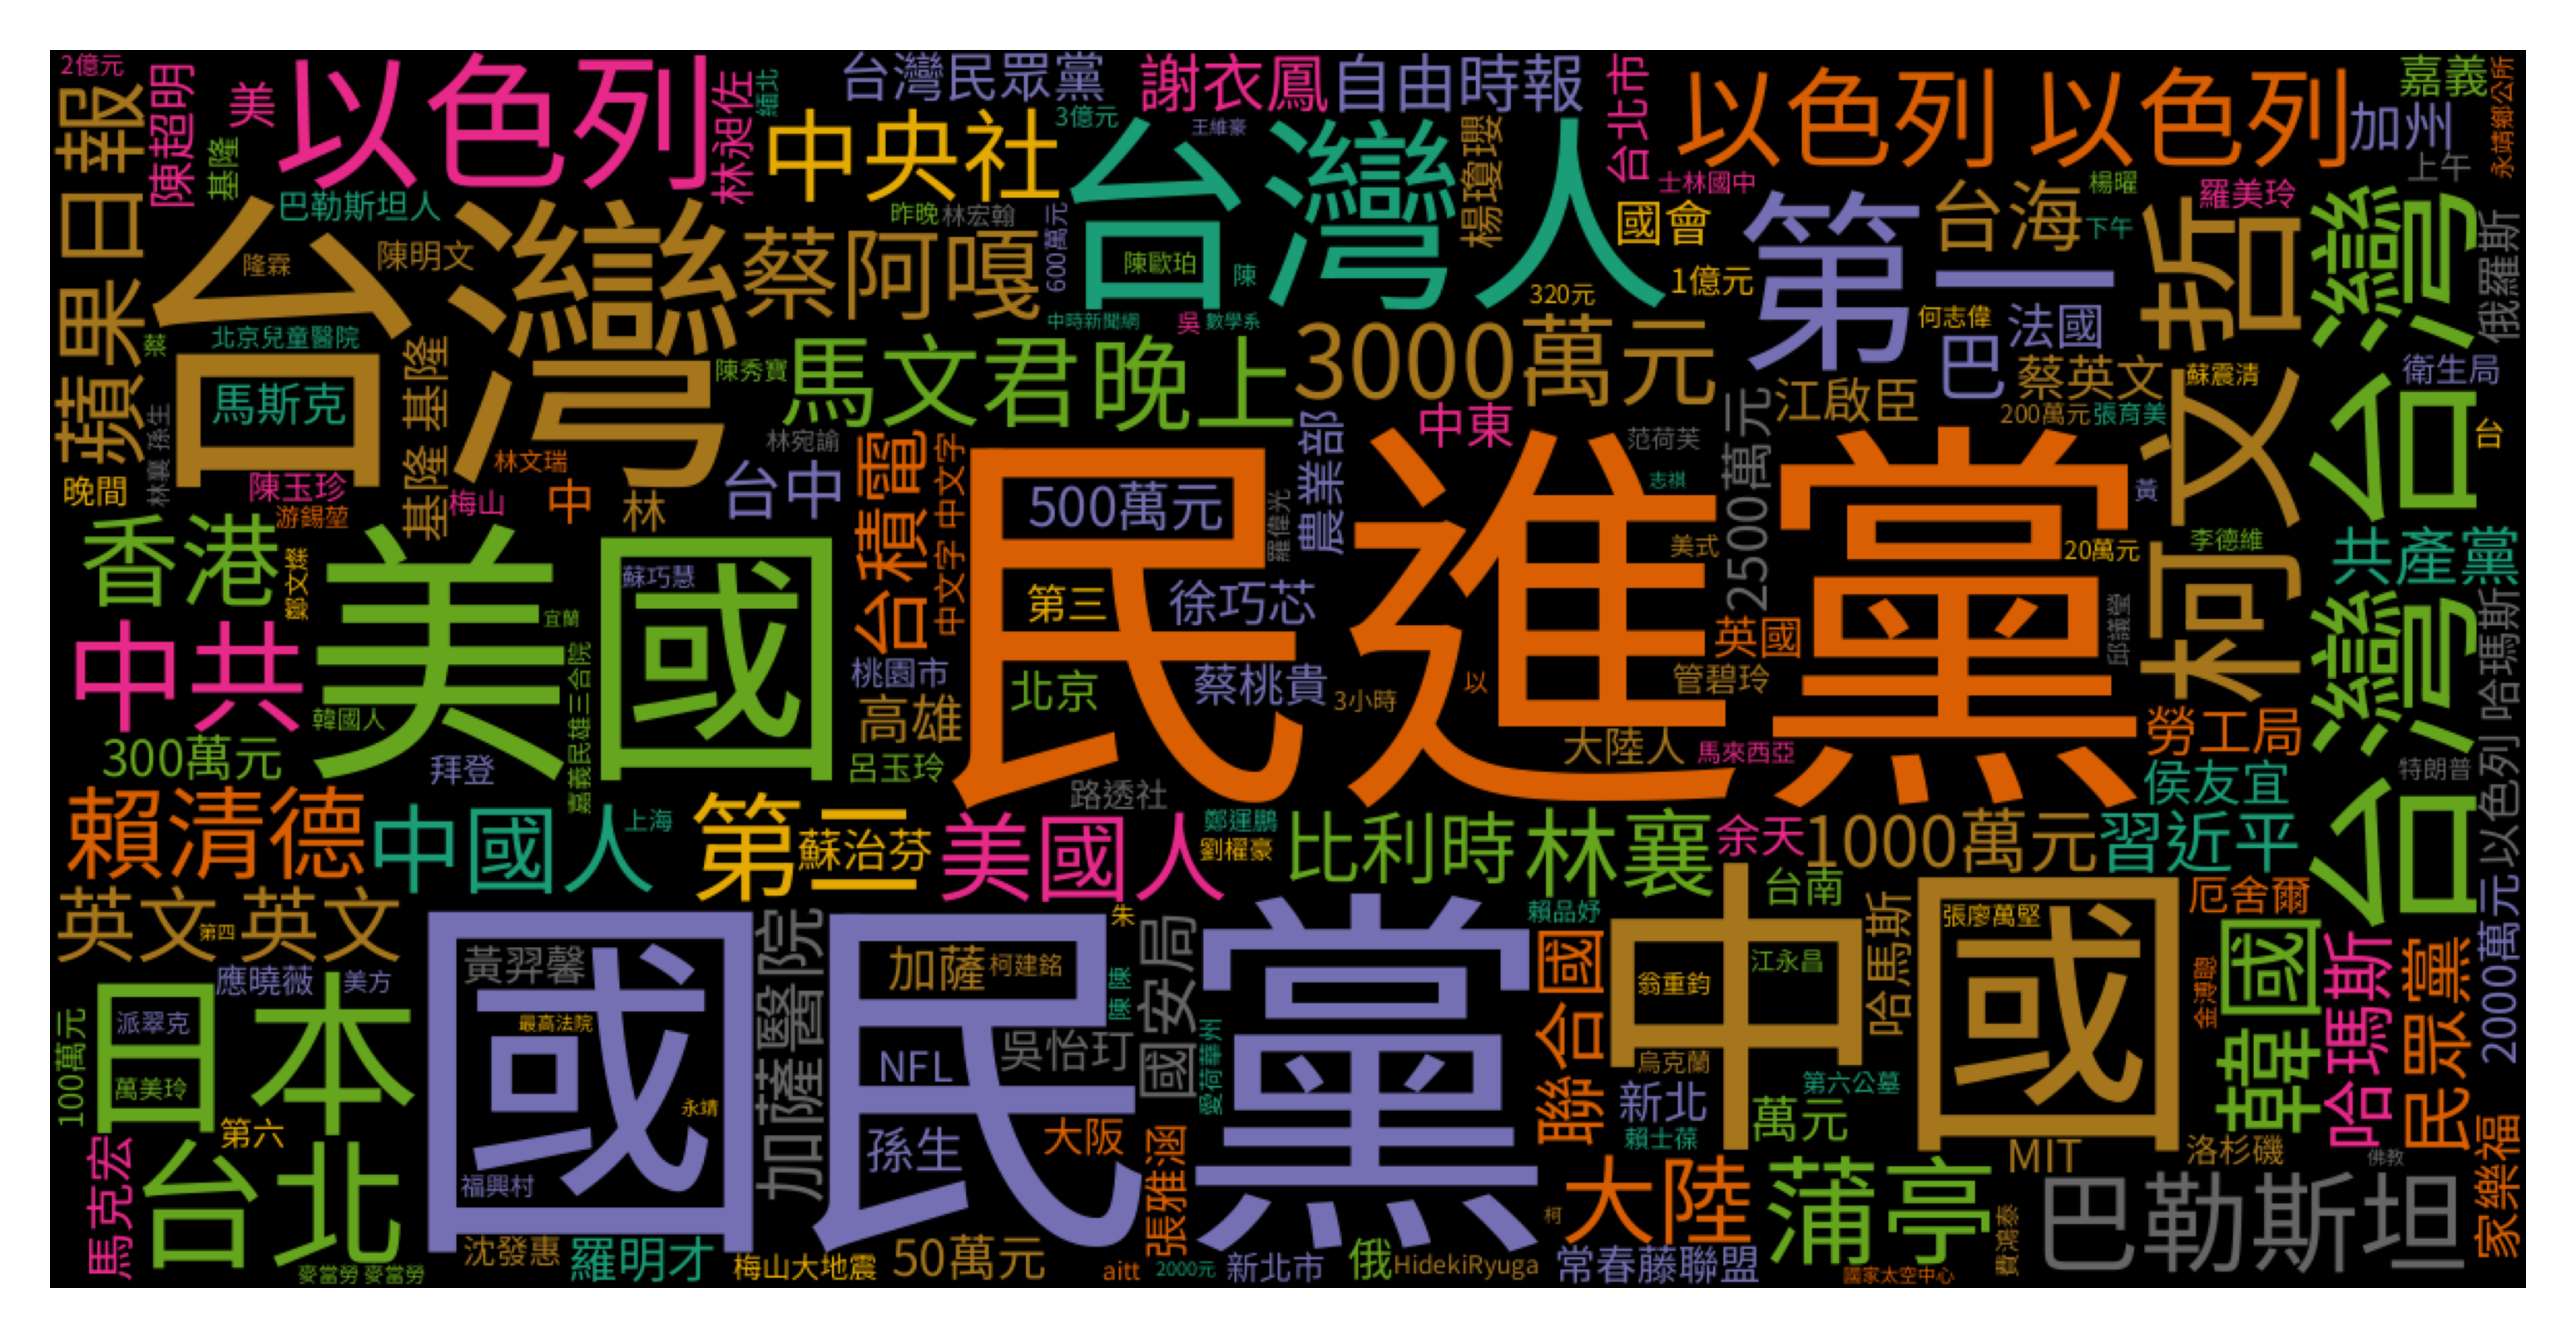

In [ ]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

# !wget "https://noto-website-2.storage.googleapis.com/pkgs/NotoSansCJKtc-hinted.zip"
# !unzip "NotoSansCJKtc-hinted.zip"

text = " ".join(review for review in count_list)
# back_color = imageio.imread("./taiwan.png")
wordcloud = WordCloud(width=1200, height=600, max_font_size=200, max_words=200, background_color="black",
                      font_path='NotoSansTC-Regular.ttf', colormap="Dark2").generate(text)
plt.figure(dpi=600)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()